In [1]:
import os
from glob import glob
import sys
import pandas
from collections import Counter
from matplotlib import pyplot
from seaborn import boxplot, stripplot, violinplot
import numpy
#from bokeh.io import output_notebook, show, save

In [2]:
LRSC=os.path.expanduser('/woldlab/loxcyc/home/diane/proj/long-rna-seq-condor/')
if LRSC not in sys.path:
    sys.path.append(LRSC)

In [3]:
from c1extra import boxplot, read_remote_sheet, get_cluster_maps, ODFReader

In [4]:
%matplotlib inline

In [5]:
LRSC = os.path.expanduser('~/proj/long-rna-seq-condor')
if LRSC not in sys.path:
    sys.path.append(LRSC)
    
from woldrnaseq.models import load_experiments
#from woldrnaseq.iplots.genes_detected import GenesDetectedPlot
from woldrnaseq.madqc import create_quantification_cache

In [6]:
#output_notebook()

In [7]:
sheet = read_remote_sheet(
    "https://woldlab.caltech.edu/nextcloud/index.php/s/Y5G5PTk5TNJaaPn/download", 
    'genes_by_cluster')
#cluster_label, cluster_color, cluster_order
cluster_maps = get_cluster_maps(sheet, 'c1_class', 'c1_abbreviations')
cluster_label = cluster_maps['label']
cluster_color = cluster_maps['color']
cluster_order = cluster_maps['order']

In [8]:
vdir = os.path.expanduser('~diane/proj/C1_mouse_limb_combined/paper_analysis_vdir')

In [9]:
runs = load_experiments([os.path.join(vdir, 'experiment_short_run_name.tsv')])

In [10]:
runs

,replicates,analysis_dir
experiment,,
run01_e10.5,"[18042_A1, 18042_A2, 18042_A3, 18042_A4, 18042...",/woldlab/loxcyc/home/diane/proj/C1_mouse_limb_...
run02_e10.5,"[17327_A2, 17327_A3, 17327_A4, 17327_A5, 17327...",/woldlab/loxcyc/home/diane/proj/C1_mouse_limb_...
run03_e10.5,"[18087_F1, 18087_F2, 18087_F3, 18087_F4, 18087...",/woldlab/loxcyc/home/diane/proj/C1_mouse_limb_...
run04_e13.5,"[18251_A1, 18251_A2, 18251_A3, 18251_A4, 18251...",/woldlab/loxcyc/home/diane/proj/C1_mouse_limb_...
run05_e11.0,"[18258_A1, 18258_A2, 18258_A3, 18258_A5, 18258...",/woldlab/loxcyc/home/diane/proj/C1_mouse_limb_...
run06_e11.5,"[18263_A2, 18263_A3, 18263_A4, 18263_A5, 18263...",/woldlab/loxcyc/home/diane/proj/C1_mouse_limb_...
run07_e12.5,"[18270_A1, 18270_A2, 18270_A3, 18270_A4, 18270...",/woldlab/loxcyc/home/diane/proj/C1_mouse_limb_...
run08_e13.5,"[18311_A1, 18311_A2, 18311_A4, 18311_A6, 18311...",/woldlab/loxcyc/home/diane/proj/C1_mouse_limb_...
run10_e11.5,"[19906_A1, 19906_A2, 19906_A3, 19906_A4, 19906...",/woldlab/loxcyc/home/diane/proj/C1_mouse_limb_...


In [11]:
sum(runs['replicates'].apply(len))

920

In [12]:
overrides = {
    'run01_e10.5': 'ENCSR013YHQ',
    'run02_e10.5': 'ENCSR156CIL',
}

In [13]:
for experiment_name, row in runs.iterrows():
    filename = experiment_name + '_gene_FPKM.csv'
    spikeins = overrides.get(experiment_name, 'ENCSR535LMC')
    template = 'python3 -m singleqc.tube_likelihood --sep , -c ~/proj/single-cell-qc/singleqc/{}.tsv --combined-single {} -o {}'
    basename, _ = os.path.splitext(filename)
    target = basename + '_likelihood.tsv'
    if not os.path.exists(os.path.join(vdir, target)):
        print(template.format(spikeins, filename, target))


python3 -m singleqc.tube_likelihood --sep , -c ~/proj/single-cell-qc/singleqc/ENCSR013YHQ.tsv --combined-single run01_e10.5_gene_FPKM.csv -o run01_e10.5_gene_FPKM_likelihood.tsv
python3 -m singleqc.tube_likelihood --sep , -c ~/proj/single-cell-qc/singleqc/ENCSR156CIL.tsv --combined-single run02_e10.5_gene_FPKM.csv -o run02_e10.5_gene_FPKM_likelihood.tsv


In [14]:
def load_psmcs(vdir):
    extension = '_gene_FPKM_likelihood.tsv'
    filenames = glob(os.path.join(vdir, 'run*' + extension))
    order = []
    psmc = []
    for filename in filenames:
        _, basename = os.path.split(filename)        
        run_name = basename[:-len(extension)].replace('_', ' ')
        order.append(run_name)
        data = pandas.read_csv(filename, sep='\t', index_col=0)
        for cell, row in data[['psmc_run']].iterrows():
            psmc.append((run_name, cell, row.psmc_run))

    psmcs = pandas.DataFrame(psmc, columns=['label', 'cell_id', 'Psmc'])
    psmcs.sort_values('label')
    return psmcs

In [15]:
psmcs = load_psmcs(vdir)
psmcs.head()

,label,cell_id,Psmc
0,run05 e11.0,18262_E2,0.20
1,run05 e11.0,18261_D2,0.18
2,run05 e11.0,18260_C7,0.93
3,run05 e11.0,18258_A5,0.21
4,run05 e11.0,18261_D4,0.23


In [16]:
cluster_count = pandas.Series(Counter(psmcs['label'])).to_frame()
cluster_count.columns = ['N']
cluster_count

,N
run05 e11.0,58
run08 e13.5,64
run15 e10.5,18
run17 e14.5,27
run13 e14.0,53
run04 e13.5,71
run10 e11.5,77
run11 e12.0,77
run14 e15.5,58
run06 e11.5,80


In [17]:
psmcs.shape

(777, 3)

In [18]:
clusters = load_experiments([os.path.join(vdir, 'experiment_cluster.tsv')])

In [19]:
clusters.index

Index(['EMP', 'chondrocyte', 'ectoderm', 'endothelial', 'macrophage',
       'mesenchyme', 'muscle1', 'muscle2', 'muscle3', 'neural_crest',
       'perichondrium'],
      dtype='object', name='experiment')

Need to use abbreviations for the cluster box plot.

I should probably be loading it out of MouseSingleCellColors.ods but I'm in a hurry.

In [20]:
cluster_name_map = {
    'EMP': 'EMP', 
    'chondrocyte': 'chon',
    'ectoderm': 'ecto', 
    'endothelial': 'endo', 
    'macrophage': 'mac',
    'mesenchyme': 'mes', 
    'muscle1': 'mus1',
    'muscle2': 'mus2', 
    'muscle3': 'mus3', 
    'neural_crest': 'neur',
    'perichondrium': 'pchon',
}

In [21]:
clusters.index = [cluster_name_map[x] for x in clusters.index]

In [22]:
cell_cluster = {}
for cluster_name, row in clusters.iterrows():
    for replicate in row.replicates:
        cell_cluster[replicate] = cluster_name

In [23]:
psmcs['cluster_name'] = psmcs['cell_id'].apply(lambda x: cell_cluster[x])

In [24]:
psmcs['color'] = psmcs['cluster_name'].apply(lambda x: cluster_color[x])

In [25]:
psmc_run_lengths = psmcs[['cluster_name', 'cell_id']].groupby('cluster_name').aggregate(len)
psmc_run_lengths.columns = ['Psmcs']
run_lengths = clusters['replicates'].apply(len).to_frame()
run_lengths.index = [x.replace('_', ' ') for x in run_lengths.index]
run_lengths.columns = ['Clusters']
run_lengths.merge(psmc_run_lengths, left_index=True, right_index=True, how='outer')

,Clusters,Psmcs
EMP,5,5
chon,57,57
ecto,8,8
endo,7,6
mac,10,10
mes,571,459
mus1,54,24
mus2,38,38
mus3,23,23
neur,8,8


In [26]:
def plot_psmc(psmc, x='label', order=None):
    if order is None:
        order = sorted(psmc[x].unique())

    mm2inch = 25.4
    fontsize = 7
    fontname = 'Arial'
    fontkw = {
        'fontsize': fontsize,
        'fontname': fontname
    }
    f = pyplot.figure(figsize=(67/mm2inch, 80.549/mm2inch), dpi=150)
    ax = f.add_subplot(1, 1, 1)
    ax.set_title('C1 cell cluster', fontname=fontname, fontsize=fontsize+2)
    boxplot(
        x=x, y='Psmc', 
        #hue='cluster_name',
        data=psmc,
        order=order,
        #color='#c0c0c0',
        palette=cluster_color,
        linewidth=0.8,
        fliersize=0,
        #width=5,
        ax=ax)
    #stripplot(x='label', y='Psmc', color='k', data=psmc,
    #          order=order, jitter=True, s=2)
    ax.legend().remove()
    ax.set_ylim([0, 1])
    ax.set_xlabel('')
    ax.set_ylabel('Psmc', **fontkw)
    for l in ax.xaxis.get_ticklabels():
        l.set_rotation(90)
        l.set_ha('center')
        l.set_fontsize(fontsize)
        l.set_fontname(fontname)

    for l in ax.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
        l.set_fontname(fontname)
    return ax

No handles with labels found to put in legend.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


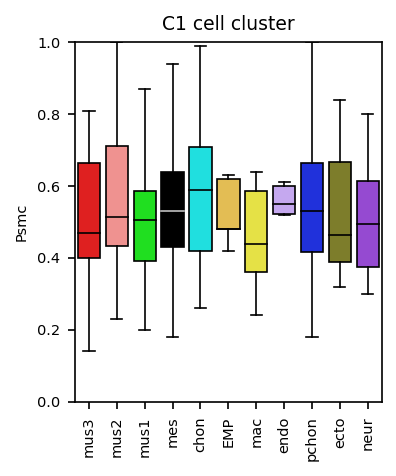

In [27]:
ax = plot_psmc(psmcs, 'cluster_name', cluster_order)

In [28]:
ax.figure.savefig('psmc_by_cluster_paper_777cells.svg', bbox_inches="tight", pad_inches=0, transparent=True)
ax.figure.savefig('psmc_by_cluster_paper_777cells.png', bbox_inches="tight", pad_inches=0, transparent=True)

In [29]:
psmcs.groupby('cluster_name').aggregate(numpy.median)

,Psmc
cluster_name,
EMP,0.480
chon,0.590
ecto,0.465
endo,0.550
mac,0.440
mes,0.530
mus1,0.505
mus2,0.515
mus3,0.470


In [30]:
cluster_color['chon']

'#00FFFF'